In [68]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [69]:
a = 0.01
epsilon = 1e-6
H = np.array([[a,1],
              [1,1/a + epsilon]]) 
P = 2 * np.array([[1,0],
              [0,0]])


H_tilde = H@P
print('norm of H_tilde:', np.linalg.norm(H_tilde, ord=2))

gamma_n = 0.1 / np.linalg.norm(H_tilde)
print('gamma:', gamma_n)

R = np.eye(2) - gamma_n * H_tilde
norm = np.linalg.norm(R, ord=2)

print('norm of I- gamma H_tilde:', norm)
print('ratio:', (norm - 1) / gamma_n)

norm of H_tilde: 2.000099997500125
gamma: 0.04999750018748438
norm of I- gamma H_tilde: 1.0507497439401372
ratio: 1.015045627278004


[1.00001785e-10 1.00010001e+02]
nombre de fois sans update: 0


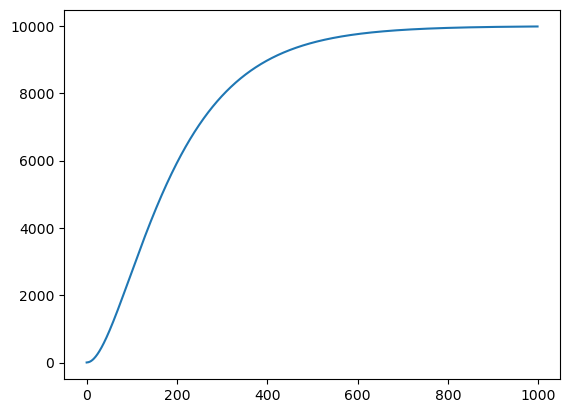

In [79]:
A = np.eye(2)
a = 1e-2
epsilon = 1e-6
H = np.array([[a,1],
              [1,1/a + epsilon]])
print(np.linalg.eigvals(H))

norm_list = []

count = 0
for n in range(1, 1000):
    # print(f'norme de A_{n}:', np.linalg.norm(A, ord=ord))
    norm_list.append(np.linalg.norm(A, ord=2))
    gamma_n = n ** (-0.75)
    M = np.zeros_like(H)
    z = random.randint(0,1)
    # M[z,z]=2
    # M[n%2, n%2] = 2
    M[0,0] = 2
    # M[1,1] = 2
    coeff = 0.735
    H_n = coeff * H / (gamma_n * np.linalg.norm(H@M, ord=2) + epsilon)
    H_tilde = H_n @ M
    if gamma_n * np.linalg.norm(H_tilde, ord=2) <= coeff:
        A = A - gamma_n * (H_tilde.T @ A + A @ H_tilde + gamma_n * H_tilde.T @ A @ H_tilde) + gamma_n**2 * P
    else:
        count+=1
print('nombre de fois sans update:', count)

plt.plot(norm_list)
plt.show()
